In [1]:

from nsepy import get_history
from datetime import datetime,timedelta,date
import pandas as pd
import numpy as np
import datetime
import matplotlib
import operator
import itertools
from nsepy.symbols import get_symbol_list, get_index_constituents_list
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename='weekly_lookback.xlsx'
df = pd.read_excel(filename,index_col=0)

df.describe()


,"nifty50,10 days","nifty50,20 days","nifty50,40 days","nifty50,80 days","nifty50,160 days","niftymidcap100,10 days","niftymidcap100,20 days","niftymidcap100,40 days","niftymidcap100,80 days","niftymidcap100,160 days","niftysmallcap100,10 days","niftysmallcap100,20 days","niftysmallcap100,40 days","niftysmallcap100,80 days","niftysmallcap100,160 days"
count,294.000000,294.000000,294.000000,294.000000,294.000000,293.000000,293.000000,293.000000,293.000000,293.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,1.000422,1.000554,1.000883,1.000458,1.002074,1.000303,1.000956,1.000505,1.001905,1.001329,1.026498,1.030338,1.028563,1.031551,1.031670
std,0.027102,0.027131,0.026752,0.027128,0.026939,0.023693,0.025950,0.025672,0.023520,0.022101,0.218723,0.286945,0.253092,0.370105,0.275464
min,0.868706,0.852525,0.868706,0.861546,0.868706,0.911632,0.871158,0.891178,0.890806,0.906149,0.860758,0.908163,0.890174,0.900352,0.888933
25%,0.985385,0.984941,0.987498,0.985859,0.989101,0.986305,0.988122,0.987744,0.989902,0.989736,0.989407,0.990470,0.990318,0.993374,0.992230
50%,1.002894,1.003519,1.003160,1.003198,1.004837,1.000885,1.002261,1.001564,1.002503,1.000423,1.005379,1.005657,1.004277,1.006097,1.006110
75%,1.016989,1.016473,1.018482,1.018583,1.017557,1.013461,1.015261,1.014270,1.014425,1.015942,1.019406,1.020603,1.019225,1.019530,1.022115
max,1.076581,1.069124,1.070732,1.068940,1.154073,1.090525,1.083670,1.116791,1.091946,1.072722,4.363967,5.293036,4.736472,7.254015,4.640883


In [3]:
#df=df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [32]:
returns={}
sharpe_ratios={}
max_drawdown={}
std_devs={}
ann_returns={}
ann_returns['metric']='annualised return'
returns['metric']='returns'
sharpe_ratios['metric']='sharpe_ratios'
max_drawdown['metric']='max_drawdown'
std_devs['metric']='std_devs'

output_df1=df.dropna()
for column in output_df1.columns.to_list():
    sharpe_ratios[column]=(output_df1[column]-1).mean()/(output_df1[column]-1).std()
    max_drawdown[column]=(output_df1[column]-1).min()
    returns[column]=output_df1[column].prod()
    ann_returns[column]=output_df1[column].prod()**1/6.05*100
    std_devs[column]=(output_df1[column]-1).std()

comparision_df=pd.DataFrame()
comparision_df=comparision_df.append(returns,ignore_index=True)
comparision_df=comparision_df.append(sharpe_ratios,ignore_index=True)
comparision_df=comparision_df.append(max_drawdown,ignore_index=True)
comparision_df=comparision_df.append(std_devs,ignore_index=True)
comparision_df=comparision_df.append(ann_returns,ignore_index=True)
comparision_df.index=comparision_df['metric']
comparision_df.T



metric,returns,sharpe_ratios,max_drawdown,std_devs,annualised return
metric,returns,sharpe_ratios,max_drawdown,std_devs,annualised return
"nifty50,10 days",1.43363,0.0887898,-0.0557382,0.0199688,23.6964
"nifty50,160 days",2.2867,0.194727,-0.0521061,0.0195616,37.7967
"nifty50,20 days",1.51138,0.0996502,-0.0443341,0.0201396,24.9815
"nifty50,40 days",2.02576,0.176573,-0.0498434,0.0184417,33.4837
"nifty50,80 days",1.85426,0.146464,-0.0495407,0.019763,30.6489
"niftymidcap100,10 days",1.24532,0.0640613,-0.0446247,0.0172873,20.5838
"niftymidcap100,160 days",2.06598,0.196712,-0.0423156,0.0168495,34.1484
"niftymidcap100,20 days",1.59004,0.116756,-0.0500041,0.0188865,26.2817
"niftymidcap100,40 days",1.76601,0.152003,-0.0462634,0.0173429,29.1902


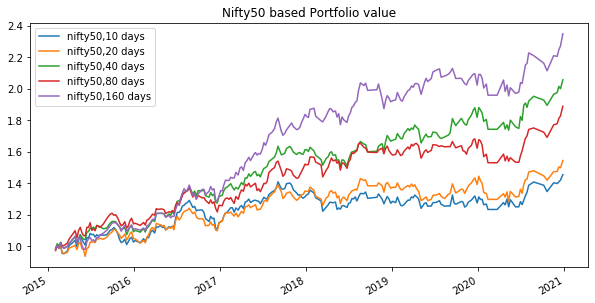

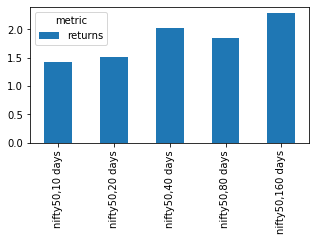

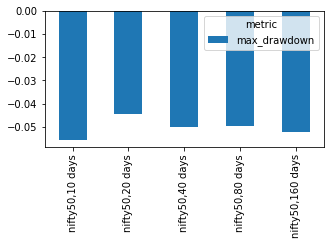

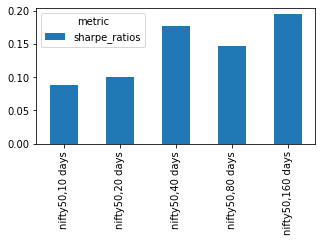

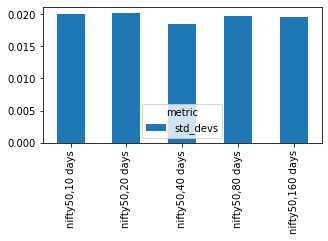

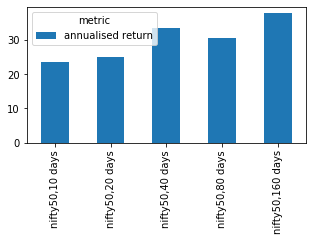

In [33]:

niftydf = df[['nifty50,10 days','nifty50,20 days','nifty50,40 days','nifty50,80 days','nifty50,160 days']]
miftymidcapdf=df[['niftymidcap100,10 days','niftymidcap100,20 days','niftymidcap100,40 days','niftymidcap100,80 days','niftymidcap100,160 days']]
niftysmallcapdf = df[['niftysmallcap100,10 days','niftysmallcap100,20 days','niftysmallcap100,40 days','niftysmallcap100,80 days','niftysmallcap100,160 days']]

niftycompdf=comparision_df[['nifty50,10 days','nifty50,20 days','nifty50,40 days','nifty50,80 days','nifty50,160 days']]
dftemp=niftydf.cumprod()
dftemp.plot(title='Nifty50 based Portfolio value',figsize=(10,5))

compdf1=niftycompdf.T
compdf1[['returns']].plot.bar(figsize=(5,2.5))
compdf1[['max_drawdown']].plot.bar(figsize=(5,2.5))
compdf1[['sharpe_ratios']].plot.bar(figsize=(5,2.5))
compdf1[['std_devs']].plot.bar(figsize=(5,2.5))
compdf1[['annualised return']].plot.bar(figsize=(5,2.5))


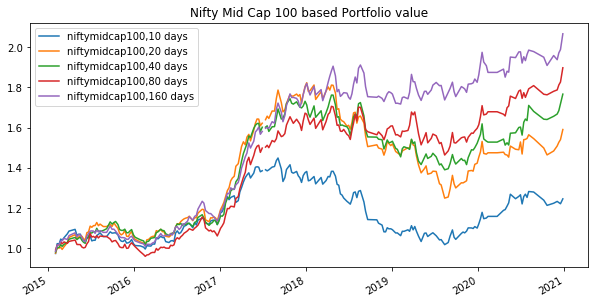

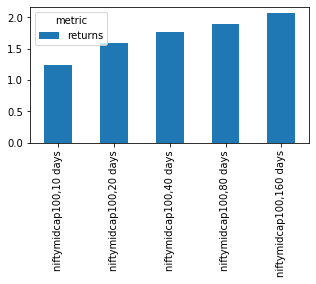

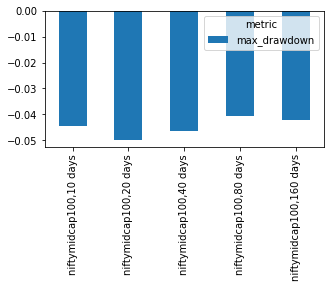

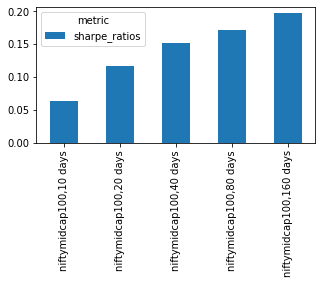

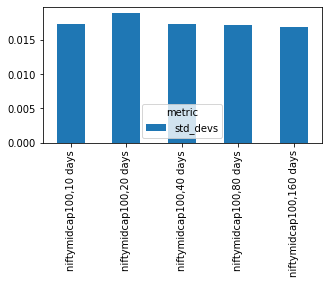

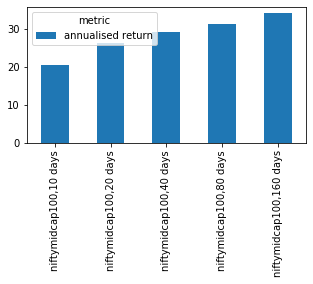

In [34]:
niftymidcompdf=comparision_df[['niftymidcap100,10 days','niftymidcap100,20 days','niftymidcap100,40 days','niftymidcap100,80 days','niftymidcap100,160 days']]
dftemp=miftymidcapdf.cumprod()
dftemp.plot(title='Nifty Mid Cap 100 based Portfolio value',figsize=(10,5))

compdf1=niftymidcompdf.T
compdf1[['returns']].plot.bar(figsize=(5,2.5))
compdf1[['max_drawdown']].plot.bar(figsize=(5,2.5))
compdf1[['sharpe_ratios']].plot.bar(figsize=(5,2.5))
compdf1[['std_devs']].plot.bar(figsize=(5,2.5))
compdf1[['annualised return']].plot.bar(figsize=(5,2.5))

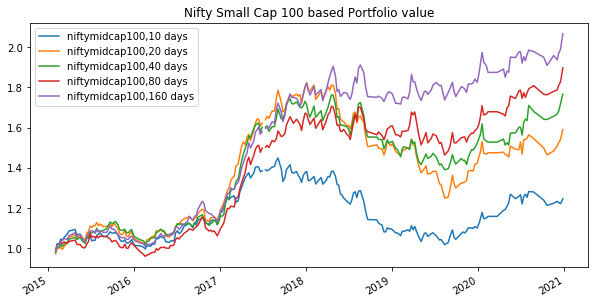

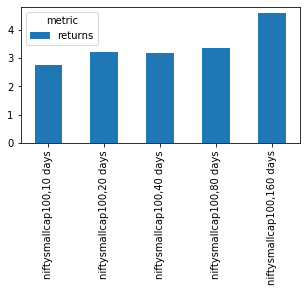

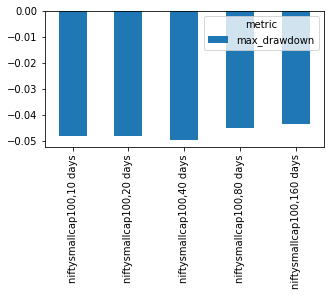

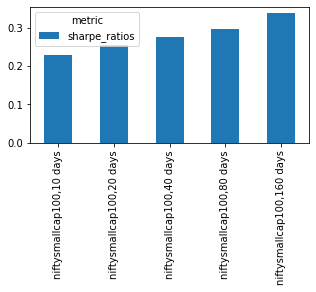

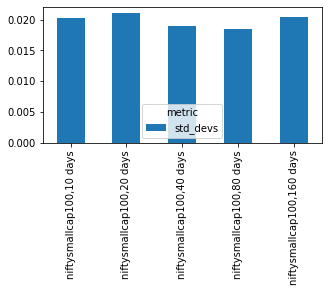

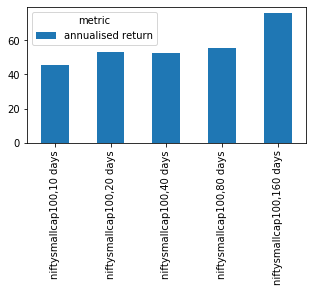

In [36]:
niftysmallcompdf=comparision_df[['niftysmallcap100,10 days','niftysmallcap100,20 days','niftysmallcap100,40 days','niftysmallcap100,80 days','niftysmallcap100,160 days']]
dftemp=miftymidcapdf.cumprod()
dftemp.plot(title='Nifty Small Cap 100 based Portfolio value',figsize=(10,5))

compdf1=niftysmallcompdf.T
compdf1[['returns']].plot.bar(figsize=(5,2.5))
compdf1[['max_drawdown']].plot.bar(figsize=(5,2.5))
compdf1[['sharpe_ratios']].plot.bar(figsize=(5,2.5))
compdf1[['std_devs']].plot.bar(figsize=(5,2.5))
compdf1[['annualised return']].plot.bar(figsize=(5,2.5))